In [9]:
import imageio
import matplotlib.pyplot as plt
import numpy as np


In [16]:

from utoolbox.data.datastore import ImageFolderDatastore

from utils import find_dataset_dir

path = find_dataset_dir('mito_seg')
print(f'loading from {path}')
datastore = ImageFolderDatastore(path, read_func=imageio.volread)

loading from G:/Vins/Mito_Binarization/11292017/c6_zp3_7ms_1s\mito_seg


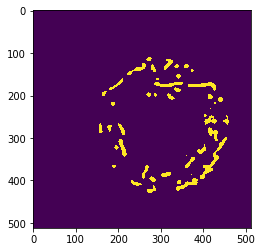

In [23]:
key = list(datastore.keys())[0]

im_mask = datastore[key]
nz = im_mask.shape[0]
plt.imshow(im_mask[nz//2, ...])

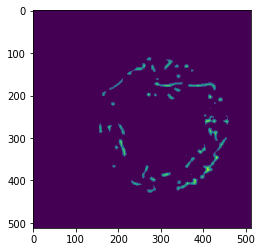

In [42]:
from scipy.ndimage.morphology import distance_transform_edt

im_dist = distance_transform_edt(im_mask, sampling=(3, 1, 1))#sampling=(0.15, 0.0515875, 0.0515875))
plt.imshow(im_dist[nz//2, ...])

In [44]:
offset = im_dist.max()
max_r = 4
threshold = offset-max_r

im_dist_cut = im_dist.copy()
im_dist_cut[im_dist < threshold] = 0

In [47]:
# shrink to [-1, +1]
im_dist_cut = (im_dist_cut-im_dist_cut.min()) / (im_dist_cut.max()-im_dist_cut.min())

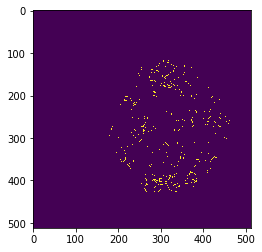

In [48]:
from skimage.morphology import skeletonize_3d

im_skel = skeletonize_3d(im_dist_cut)
plt.imshow(im_skel.max(axis=0))

In [49]:
imageio.volwrite('skel.tif', im_skel * 255)

In [50]:
im_skel.sum()

541365